In [1]:
##required libraries

import pandas as pd
import numpy as np
import math as mt
import seaborn as sb
import matplotlib.pyplot as plt



In [2]:
## accessing the datafile
Delivery_Records = pd.read_csv("deliverytime.txt")

Delivery_Records.head(10)    ### displays the first n rows in the data set

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30
5,9BB4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,Buffet,motorcycle,26
6,95B4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,Meal,scooter,40
7,9EB2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,Meal,motorcycle,32
8,1102,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,Buffet,motorcycle,34
9,CDCD,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,Snack,motorcycle,46


In [3]:
Delivery_Records.info()   ##displays the feature/datatype of each column in the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [4]:
## checking the dataset for missing entries

print(Delivery_Records.isnull().sum())

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64


In [11]:
## we have no missing entries 

In [5]:
### calculating distance between restaurant and delivery point
### formula used= acos(sin(lat1)*sin(lat2)+cos(lat1)*cos(lat2)*cos(lon2-lon1))*6371
pi = mt.pi

Delivery_Records['Travel_Distance'] = 0

Delivery_Records['Travel_Distance'] = np.arccos(np.sin(Delivery_Records['Restaurant_latitude']*pi/180)*np.sin(Delivery_Records['Delivery_location_latitude']*pi/180)+np.cos(Delivery_Records['Restaurant_latitude']*pi/180)*np.cos(Delivery_Records['Delivery_location_latitude']*pi/180)*np.cos((Delivery_Records['Delivery_location_longitude']-Delivery_Records['Restaurant_longitude'])*pi/180))*6371

Delivery_Records.head()



,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),Travel_Distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138


In [6]:
## firstly we do a basic summarry of Age, ratings, time,

## distance, order type and vehicle type

## as those will be the main variables

Delivery_Records[['Delivery_person_Age','Delivery_person_Ratings','Time_taken(min)','Travel_Distance']].describe(include="all")

,Delivery_person_Age,Delivery_person_Ratings,Time_taken(min),Travel_Distance
count,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,26.294607,99.303911
std,5.696793,0.327708,9.383806,1099.731281
min,15.000000,1.000000,10.000000,1.465067
25%,25.000000,4.600000,19.000000,4.663493
50%,29.000000,4.700000,26.000000,9.264281
75%,34.000000,4.800000,32.000000,13.763977
max,50.000000,6.000000,54.000000,19692.674606


In [7]:
### for non numeric, we can just count number unique occurences

### this allows us see which kind of orders are most frequent, and the type of vehicles used by most couriers

print(Delivery_Records['Type_of_order'].value_counts())

print(Delivery_Records['Type_of_vehicle'].value_counts())

Snack      11533
Meal       11458
Drinks     11322
Buffet     11280
Name: Type_of_order, dtype: int64
motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: Type_of_vehicle, dtype: int64


In [21]:
## here we do a series of simple plots to visualise the data
## and compare various variables with respect to delivery times to find out which ones have the most effect
## also a plot of ratings vs distance and any other that comes to mind just for fun
## we will also calculate correlation coefficient for each


[[ 1.         -0.00250807]
 [-0.00250807  1.        ]]


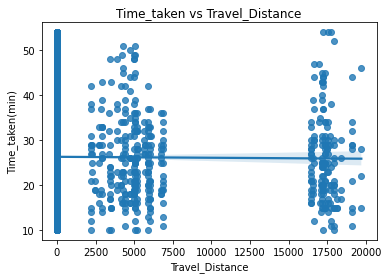

In [9]:
## distance vs delivery time
## you can also use seaborn to plot, it has an automatic regression plot function
## other libraries like matplotlib can be used

sb.regplot(x= 'Travel_Distance', y= 'Time_taken(min)', data = Delivery_Records).set_title('Time_taken vs Travel_Distance')

Time_Distance = np.corrcoef(Delivery_Records['Travel_Distance'], Delivery_Records['Time_taken(min)'])

print(Time_Distance)

## from the plot and correlation coefficient it can be easily deduced that very weak linear relationship 
## exists between delivery time and distance

[[1.         0.29270786]
 [0.29270786 1.        ]]


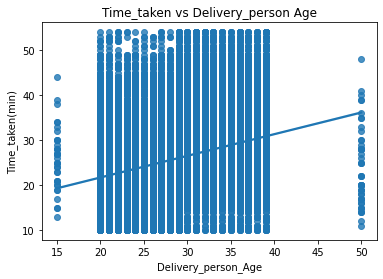

In [10]:
## delivery_time vs driver age
sb.regplot(x= 'Delivery_person_Age', y='Time_taken(min)', data=Delivery_Records).set_title('Time_taken vs Delivery_person Age')


Time_Age = np.corrcoef(Delivery_Records['Delivery_person_Age'], Delivery_Records['Time_taken(min)'])

print(Time_Age)

## a relatively strong positive relationship between delivery time and delivery person age

[[ 1.         -0.33110272]
 [-0.33110272  1.        ]]


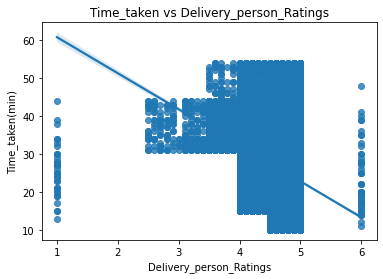

In [11]:
### delivery time vs ratings

sb.regplot(x='Delivery_person_Ratings', y='Time_taken(min)', data=Delivery_Records).set_title('Time_taken vs Delivery_person_Ratings')


Time_Ratings = np.corrcoef(Delivery_Records['Delivery_person_Ratings'], Delivery_Records['Time_taken(min)'])

print(Time_Ratings)

##negative linear relationship

<AxesSubplot:>

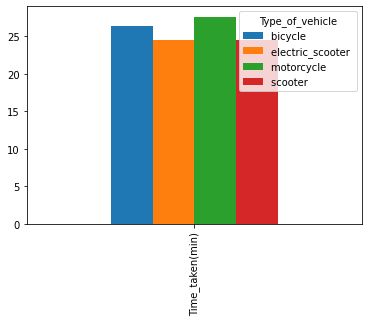

In [12]:
### Vehicle type vs delivery time

time_vehicle = Delivery_Records[['Type_of_vehicle', 'Time_taken(min)']]

time_vehicle_sum = time_vehicle.groupby(['Type_of_vehicle']).mean()

time_vehicle_sum.transpose().plot.bar()

## the means of the vehicle types do not differ significantly, 
## hence we can ignore vehicle type influence in our prediction model

<AxesSubplot:>

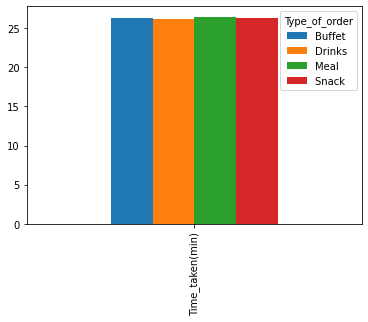

In [13]:
### time_taken vs order_type

time_order = Delivery_Records[['Type_of_order', 'Time_taken(min)']]

time_order_sum = time_order.groupby(['Type_of_order']).mean()

time_order_sum.transpose().plot.bar()

## the delivery time for order types are also similar
## hence we can ignore vehicle type influence in our prediction model

Text(0.5, 1.0, 'Vehicle_Type Numbers')

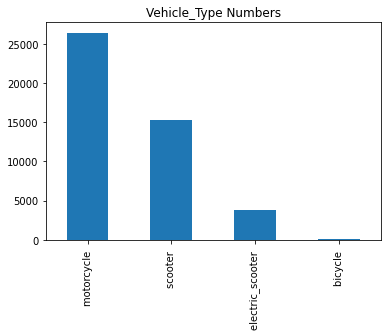

In [14]:
## other fun visualization, pie and bar charts to show most common type of vehicle and type of order

Delivery_Records['Type_of_vehicle'].value_counts().plot(kind='bar').set_title('Vehicle_Type Numbers')


Text(0.5, 1.0, 'Order_Type Numbers')

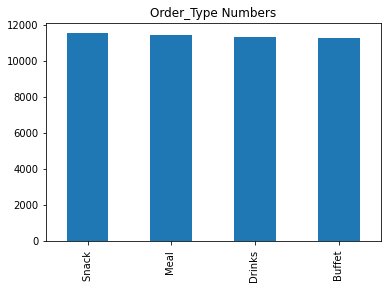

In [15]:
## order types


Delivery_Records['Type_of_order'].value_counts().plot(kind='bar').set_title('Order_Type Numbers')


In [16]:
## machine learning model

from sklearn.model_selection import train_test_split

y = np.array(Delivery_Records[['Time_taken(min)']])

x = np.array(Delivery_Records[['Travel_Distance', 'Delivery_person_Age', 'Delivery_person_Ratings']])




In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

In [22]:
## using a multiple linear regression model

LR = LinearRegression()
LR.fit(x_train, y_train)


LinearRegression()

In [23]:
y_prediction = LR.predict(x)

In [24]:
## checking our model accuracy

from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

accuracy_score = r2_score(y, y_prediction)

print(accuracy_score)



mean_sq= mean_squared_error(y, y_prediction)

print(mean_sq)

## a positive r2 score indicates the model accuracy, the closer it is to 1, it indicates how well the predictions fit the original data

0.18312681337480374
71.92885879863063


In [29]:
## this section allows you to enter your own values for the model to predict

age = int (input("Enter driver age: "))

rating = float (input("Enter driver rating: "))

distance = float (input("Enter distance the driver has to travel: "))

x_vals = np.array([[age, rating, distance]])

y_pred = LR.predict(x_vals)

print("Your order will arrive in about ",y_pred, "minutes")

Enter driver age: 37
Enter driver rating: 4.7
Enter distance the driver has to travel: 3.01
Your order will arrive in about  [[29.63706601]] minutes
